<a href="https://colab.research.google.com/github/prakarshjain28/DL_Activation_Project/blob/master/classification_mnist_using_fnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classify images using custom activation functions (MNIST dataset)

This guide trains a neural network model to classify images of clothing, like sneakers and shirts using custom activation functions


In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


## Import the Fashion MNIST dataset


Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

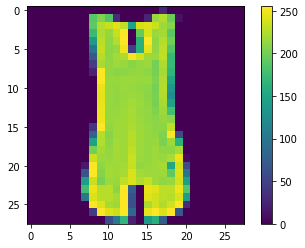

In [4]:
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

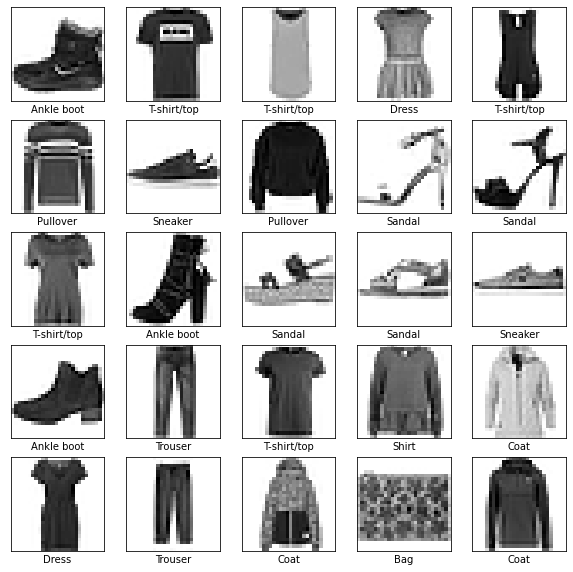

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Custom Activation Functions

In [0]:
# f(x) = sin(x)
def sin_act(x):
  return tf.math.sin(x, name=None)

# f(x) = ln(1 + e^x)
def softPlus(x):
  return tf.math.log(1.0 + tf.math.exp(x, name=None))

# f(x) = arctan(x)
def arcTan(x):
  return tf.math.atan(x)


# f(x) = ln(1 + (e^x/(1 + e^x)))
def custom_1(x):
  return tf.math.log(1.0 + (tf.math.exp(x) / (1.0 + tf.math.exp(x))))


# f(x) = ((x^2 + 1)^(1/2) + x)/2 - 1
def custom_2(x):
  return ((tf.math.sqrt(x**2+1) - 1.0) / 2.0 + 0.5*x)

#f(x)=((log(sin^2(x)+2))-1)
def custom_3(x):
  return ((tf.math.log(tf.math.sin(x)**2+2) - 1.0) )


### Set up the layers

![NN MIST](https://raw.githubusercontent.com/rahuldkjain/classification-using-custom-activation-functions/master/assets/NN-mnist.png)

In [0]:
def setupLayers(activationFunction):
  model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),
      keras.layers.Dense(128, activation=activationFunction),
      keras.layers.Dense(10)
  ])
  return model



### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [0]:
def compileModel(model):
  model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [0]:
def trainModel(model):
  history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))
  return history

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [0]:
def evaluateModel(model):
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  print('\nTest accuracy: ' + str(test_acc*100) + '%')

It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

### Plot

In [0]:
def plot(history, title, type_1, type_2, yLabel):
  plt.plot(history.history[type_1], label=type_1)
  plt.plot(history.history[type_2], label = type_2)
  plt.title(title)
  plt.xlabel('Epoch')
  plt.ylabel(yLabel)
  plt.ylim([0.5, 1])
  plt.legend(loc='lower right')

### Run Model

In [0]:
def run(activationFunction):
  model = setupLayers(activationFunction)
  compileModel(model)
  print('***************************** '+ str(activationFunction) + 'Activation ***********************')
  history = trainModel(model)
  evaluateModel(model)
  return history

## Using Sigmoid Activation Function

***************************** sigmoidActivation ***********************
Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5464 - accuracy: 0.8136 - val_loss: 0.4647 - val_accuracy: 0.8320
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3926 - accuracy: 0.8589 - val_loss: 0.4162 - val_accuracy: 0.8485
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3564 - accuracy: 0.8703 - val_loss: 0.3807 - val_accuracy: 0.8607
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3311 - accuracy: 0.8809 - val_loss: 0.3652 - val_accuracy: 0.8679
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3130 - accuracy: 0.8859 - val_loss: 0.3600 - val_accuracy: 0.8691
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2982 - accuracy: 0.8903 - val_loss: 0.3478 - val_accuracy: 0.8776
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/s

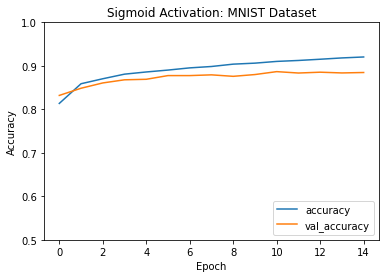

In [14]:
sigmoidHistory = run('sigmoid')
plot(sigmoidHistory, 'Sigmoid Activation: MNIST Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

## Using ReLU Activation Function

***************************** reluActivation ***********************
Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4935 - accuracy: 0.8270 - val_loss: 0.4211 - val_accuracy: 0.8525
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3723 - accuracy: 0.8646 - val_loss: 0.3667 - val_accuracy: 0.8702
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3348 - accuracy: 0.8769 - val_loss: 0.3698 - val_accuracy: 0.8670
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3120 - accuracy: 0.8854 - val_loss: 0.3593 - val_accuracy: 0.8707
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2947 - accuracy: 0.8913 - val_loss: 0.3566 - val_accuracy: 0.8719
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2797 - accuracy: 0.8962 - val_loss: 0.3564 - val_accuracy: 0.8716
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step

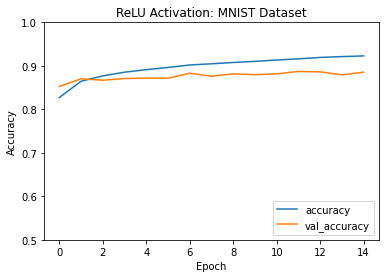

In [15]:
reluHistory = run('relu')
plot(reluHistory, 'ReLU Activation: MNIST Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

## Using tanh Activation Function

***************************** tanhActivation ***********************
Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4815 - accuracy: 0.8278 - val_loss: 0.4160 - val_accuracy: 0.8543
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3701 - accuracy: 0.8653 - val_loss: 0.3893 - val_accuracy: 0.8609
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3378 - accuracy: 0.8774 - val_loss: 0.3638 - val_accuracy: 0.8673
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3149 - accuracy: 0.8833 - val_loss: 0.3521 - val_accuracy: 0.8736
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2969 - accuracy: 0.8900 - val_loss: 0.3496 - val_accuracy: 0.8756
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.8953 - val_loss: 0.3597 - val_accuracy: 0.8705
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step

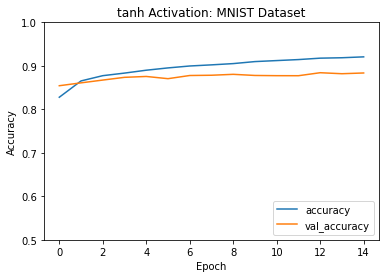

In [16]:
tanhHistory = run('tanh')
plot(tanhHistory, 'tanh Activation: MNIST Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

## Using arcTan Activation Function

***************************** <function arcTan at 0x7fa74d7d82f0>Activation ***********************
Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4828 - accuracy: 0.8278 - val_loss: 0.4192 - val_accuracy: 0.8524
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3806 - accuracy: 0.8626 - val_loss: 0.4496 - val_accuracy: 0.8344
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3459 - accuracy: 0.8730 - val_loss: 0.3883 - val_accuracy: 0.8566
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3213 - accuracy: 0.8826 - val_loss: 0.3575 - val_accuracy: 0.8684
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3026 - accuracy: 0.8889 - val_loss: 0.3621 - val_accuracy: 0.8670
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2888 - accuracy: 0.8927 - val_loss: 0.3448 - val_accuracy: 0.8795
Epoch 7/15
1875/1875 [==============

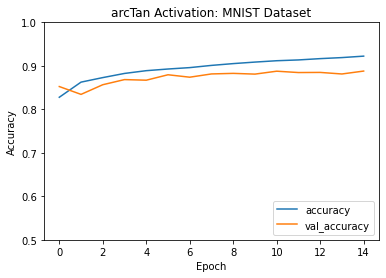

In [17]:
arcTanHistory = run(arcTan)
plot(arcTanHistory, 'arcTan Activation: MNIST Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

## Using Custom-1 Activation Function

***************************** <function custom_1 at 0x7fa74d7d8158>Activation ***********************
Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5727 - accuracy: 0.8087 - val_loss: 0.4542 - val_accuracy: 0.8379
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3945 - accuracy: 0.8581 - val_loss: 0.4031 - val_accuracy: 0.8536
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3590 - accuracy: 0.8699 - val_loss: 0.3862 - val_accuracy: 0.8613
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3339 - accuracy: 0.8786 - val_loss: 0.3766 - val_accuracy: 0.8647
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3161 - accuracy: 0.8845 - val_loss: 0.3545 - val_accuracy: 0.8699
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3021 - accuracy: 0.8901 - val_loss: 0.3580 - val_accuracy: 0.8696
Epoch 7/15
1875/1875 [============

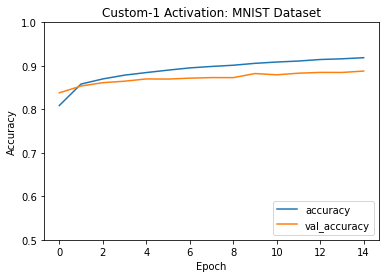

In [25]:
custom_1_History = run(custom_1)
plot(custom_1_History, 'Custom-1 Activation: MNIST Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

## Using Custom-2 Activation Function

***************************** <function custom_2 at 0x7fa74d7d86a8>Activation ***********************
Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4955 - accuracy: 0.8241 - val_loss: 0.4048 - val_accuracy: 0.8596
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3704 - accuracy: 0.8651 - val_loss: 0.4077 - val_accuracy: 0.8524
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3347 - accuracy: 0.8773 - val_loss: 0.3616 - val_accuracy: 0.8680
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3076 - accuracy: 0.8857 - val_loss: 0.3537 - val_accuracy: 0.8727
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2903 - accuracy: 0.8925 - val_loss: 0.3463 - val_accuracy: 0.8735
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2743 - accuracy: 0.8974 - val_loss: 0.3433 - val_accuracy: 0.8781
Epoch 7/15
1875/1875 [============

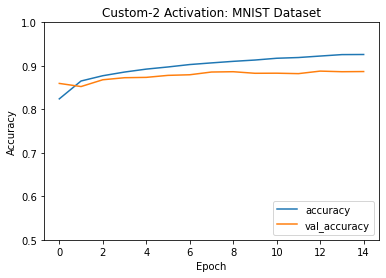

In [19]:
custom_2_History = run(custom_2)
plot(custom_2_History, 'Custom-2 Activation: MNIST Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

## Using Custom-3 Activation

***************************** <function custom_3 at 0x7fa74d78b598>Activation ***********************
Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5821 - accuracy: 0.8226 - val_loss: 0.4765 - val_accuracy: 0.8359
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4235 - accuracy: 0.8583 - val_loss: 0.4745 - val_accuracy: 0.8394
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4016 - accuracy: 0.8623 - val_loss: 0.4504 - val_accuracy: 0.8389
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4050 - accuracy: 0.8601 - val_loss: 0.4550 - val_accuracy: 0.8460
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3942 - accuracy: 0.8653 - val_loss: 0.4493 - val_accuracy: 0.8450
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3829 - accuracy: 0.8674 - val_loss: 0.4516 - val_accuracy: 0.8397
Epoch 7/15
1875/1875 [============

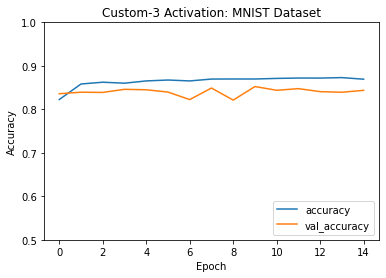

In [20]:
custom_3_History = run(custom_3)
plot(custom_3_History, 'Custom-3 Activation: MNIST Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

## Validation Accuracy Comparison

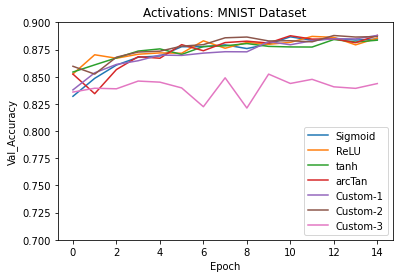

In [27]:
plt.plot(sigmoidHistory.history['val_accuracy'], label = 'Sigmoid')
plt.plot(reluHistory.history['val_accuracy'], label='ReLU')
plt.plot(tanhHistory.history['val_accuracy'], label='tanh')
plt.plot(arcTanHistory.history['val_accuracy'], label='arcTan')
plt.plot(custom_1_History.history['val_accuracy'], label='Custom-1')
plt.plot(custom_2_History.history['val_accuracy'], label='Custom-2')
plt.plot(custom_3_History.history['val_accuracy'], label='Custom-3')
plt.title('Activations: MNIST Dataset')
plt.xlabel('Epoch')
plt.ylabel('Val_Accuracy')
plt.ylim([0.7, 0.9])
plt.legend(loc='lower right')


## Accuracy Comparison

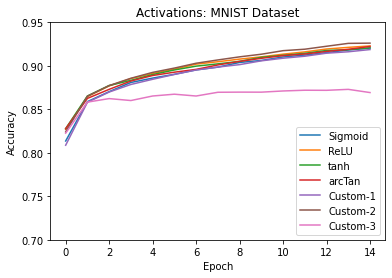

In [28]:
plt.plot(sigmoidHistory.history['accuracy'], label = 'Sigmoid')
plt.plot(reluHistory.history['accuracy'], label='ReLU')
plt.plot(tanhHistory.history['accuracy'], label='tanh')
plt.plot(arcTanHistory.history['accuracy'], label='arcTan')
plt.plot(custom_1_History.history['accuracy'], label='Custom-1')
plt.plot(custom_2_History.history['accuracy'], label='Custom-2')
plt.plot(custom_3_History.history['accuracy'], label='Custom-3')
plt.title('Activations: MNIST Dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 0.95])
plt.legend(loc='lower right')

## Validation Loss Comparison

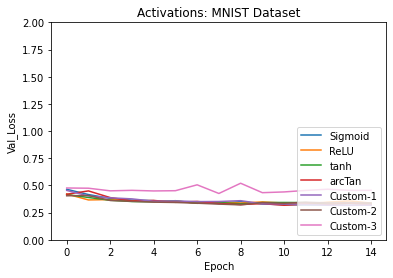

In [29]:
plt.plot(sigmoidHistory.history['val_loss'], label = 'Sigmoid')
plt.plot(reluHistory.history['val_loss'], label='ReLU')
plt.plot(tanhHistory.history['val_loss'], label='tanh')
plt.plot(arcTanHistory.history['val_loss'], label='arcTan')
plt.plot(custom_1_History.history['val_loss'], label='Custom-1')
plt.plot(custom_2_History.history['val_loss'], label='Custom-2')
plt.plot(custom_3_History.history['val_loss'], label='Custom-3')
plt.title('Activations: MNIST Dataset')
plt.xlabel('Epoch')
plt.ylabel('Val_Loss')
plt.ylim([0.0, 2])
plt.legend(loc='lower right')

## Loss Comparison


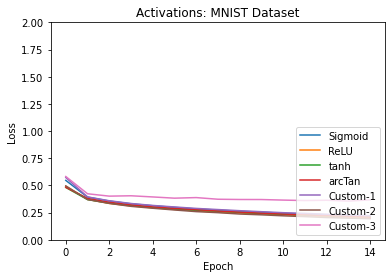

In [30]:
plt.plot(sigmoidHistory.history['loss'], label = 'Sigmoid')
plt.plot(reluHistory.history['loss'], label='ReLU')
plt.plot(tanhHistory.history['loss'], label='tanh')
plt.plot(arcTanHistory.history['loss'], label='arcTan')
plt.plot(custom_1_History.history['loss'], label='Custom-1')
plt.plot(custom_2_History.history['loss'], label='Custom-2')
plt.plot(custom_3_History.history['loss'], label='Custom-3')
plt.title('Activations: MNIST Dataset')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')